Machine learning is the driving force behind all kinds of modern conveniences and automation systems like ATMs that can read handwritten text, smartphones that translate speech to text and self-driving cars. The methods used in such cutting-edge applications are more advanced than anything we'll cover in this introduction, but they are all based on the principles of taking data and applying some learning algorithm to it to arrive at some sort of prediction.

Linear regression is a predictive modeling technique for predicting a numeric response variable based on one or more explanatory variables. The term "regression" in predictive modeling generally refers to any modeling task that involves predicting a real number (as opposed classification, which involves predicting a category or class.). The term "linear" in the name linear regression refers to the fact that the method models data with linear combination of the explanatory variables. A linear combination is an expression where one or more variables are scaled by a constant factor and added together. In the case of linear regression with a single explanatory variable, the linear combination used in linear regression can be expressed as:

response = intercept + constant ∗ explanatory

The right side if the equation defines a line with a certain y-intercept and slope times the explanatory variable. In other words, linear regression in its most basic form fits a straight line to the response variable. The model is designed to fit a line that minimizes the squared differences (also called errors or residuals.). We won't go into all the math behind how the model actually minimizes the squared errors, but the end result is a line intended to give the "best fit" to the data. Since linear regression fits data with a line, it is most effective in cases where the response and explanatory variable have a linear relationship.

Let's revisit the mtcars data set and use linear regression to predict vehicle gas mileage based on vehicle weight. First, let's load some libraries and look at a scatterplot of weight and mpg to get a sense of the shape of the data:

In [15]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2


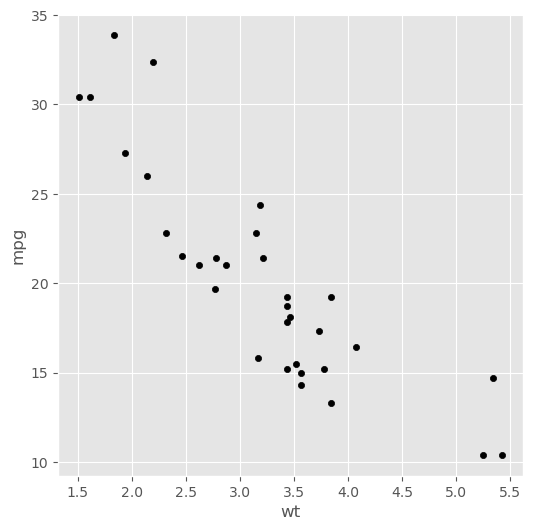

In [19]:
# Load mtcars data set
mtcars = pd.read_csv(r"D:\DS-Batch1\DS dataset\mtcars.csv")
print(mtcars.head())
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(6,6),
           color="black");

The scatterplot shows a roughly linear relationship between weight and mpg, suggesting a linear regression model might work well.

Python's scikit-learn library contains a wide range of functions for predictive modeling. Let's load its linear regression training function and fit a line to the mtcars data:

In [20]:
from sklearn import linear_model

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


The output above shows the model intercept and coefficients used to create the best fit line. In this case the y-intercept term is set to 37.2851 and the coefficient for the weight variable is -5.3445.
In other words, the model fit the line: 

mpg = 37.2851 - 5.3445 * wt.

We can get a sense of how much of the variance in the response variable is explained by the model using the model.score() function:

In [21]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])

0.7528327936582646

The output of the score function for linear regression is "R-squared", a value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model. In this case, car weight explains roughly 75% of the variance in mpg.

The R-squared measure is based on the residuals: differences between what the model predicts for each data point and the actual value of each data point. We can extract the model's residuals by making a prediction with the model on the data and then subtracting the actual value from each prediction:

In [22]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

# Actual - prediction = residuals
residuals = mtcars["mpg"] - train_prediction

residuals.describe()

count    3.200000e+01
mean    -4.996004e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

R-squared is calculated as 1 - (SSResiduals/SSTotal) were SSResiduals is the sum of the squares of the model residuals and SSTotal is the sum of the squares of the difference between each data point and the mean of the data. We could calculate R-squared by hand like this:

In [24]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

0.7528327936582646

Now that we have a linear model, let's plot the line it fits on our scatterplot to get a sense of how well it fits the data:

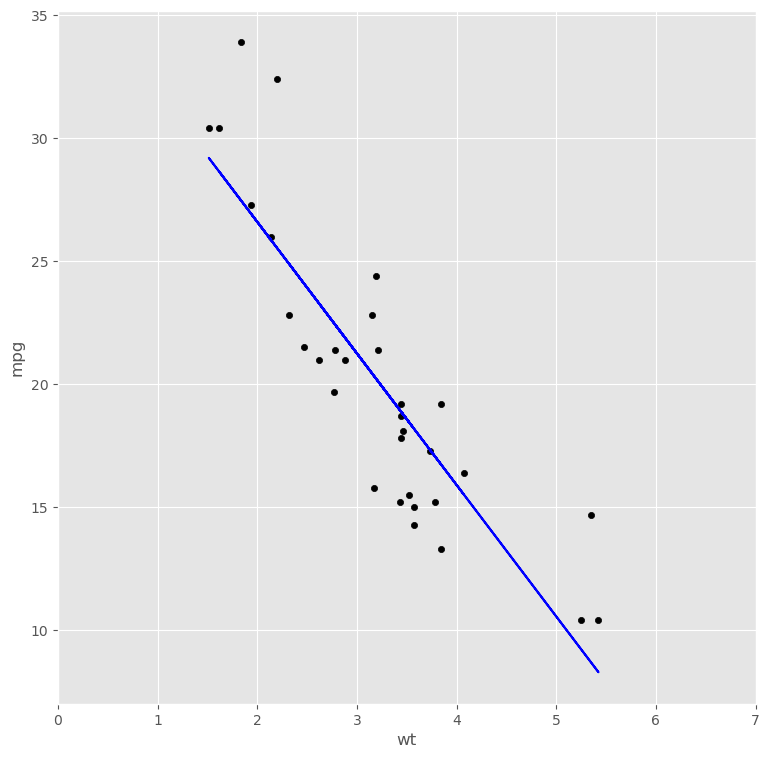

In [25]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(mtcars["wt"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");

The regression line looks like a reasonable fit and it follows our intuition: as car weight increases we would expect fuel economy to decline.

Outliers can have a large influence on linear regression models: since regression deals with minimizing squared residuals, large residuals have a disproportionately large influence on the model. Plotting the result helps us detect influential outliers. In this case there does not appear to be any influential outliers. Let's add an outlier--a super heavy fuel efficient car--and plot a new regression model:

C:\Users\excel\AppData\Local\Temp\ipykernel_36540\2520179934.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_cars = mtcars_subset.append(super_car)


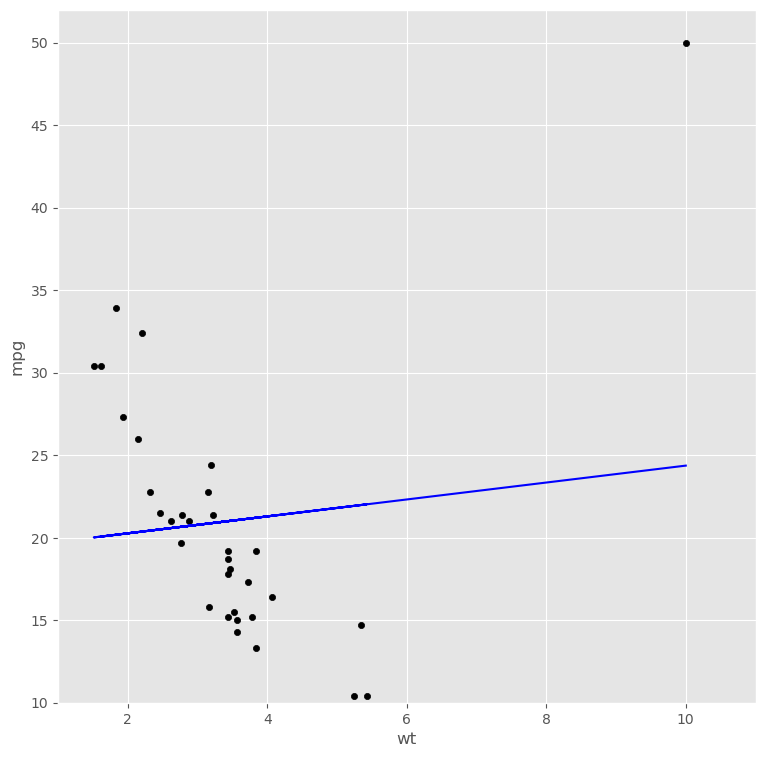

In [26]:
mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = mtcars_subset.append(super_car)

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the new_cars data
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

# Plot the new model
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))

# Plot regression line
plt.plot(new_cars["wt"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue");


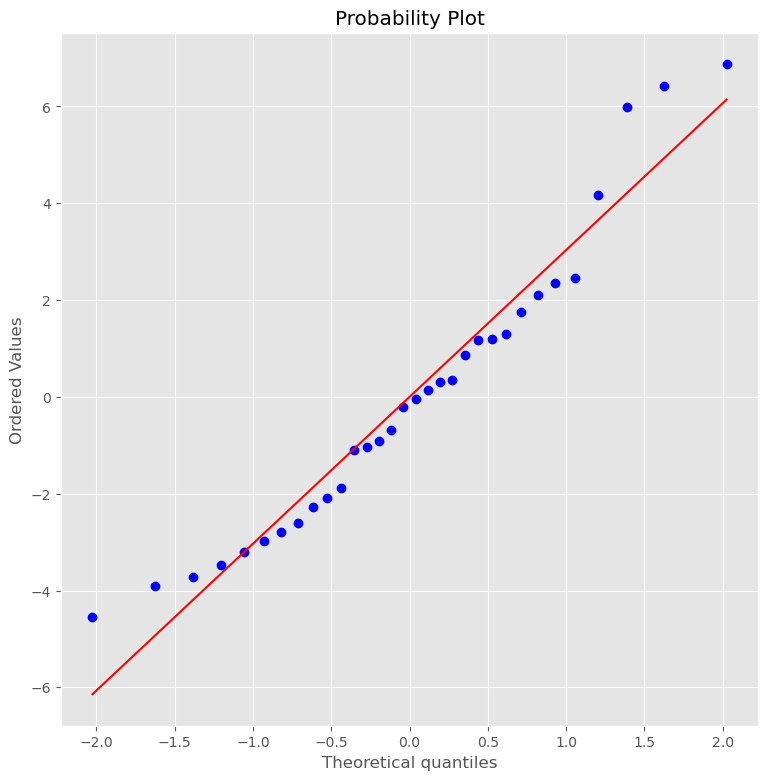

In [27]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt);

When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot. In this case residuals appear to follow a slightly non-linear pattern: the residuals are bowed a bit away from the normality line on each end. This is an indication that simple straight line might not be sufficient to fully describe the relationship between weight and mpg.

After making model predictions, it is useful to have some sort of metric to evaluate oh well the model performed. Adjusted R-squared is one useful measure, but it only applies to the regression model itself: we'd like some universal evaluation metric that lets us compare the performance of different types of models. Root mean squared error (RMSE) is a common evaluation metric for predictions involving real numbers. Root mean squared error is square root of the average of the squared error (residuals.). 

In [13]:
def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

rmse(train_prediction, mtcars["mpg"])

2.949162685955028

Instead of defining your own RMSE function, you can use the scikit-learn library's mean squared error function and take the square root of the result:

In [28]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5

RMSE

2.949162685955028